In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score


import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
df_train = pd.read_csv ('fashion-mnist_train.csv')
df_test = pd.read_csv ('fashion-mnist_test.csv')

## Exploring the data to see the size and its features

In [3]:
df_train.shape

(60000, 785)

In [4]:
df_test.shape

(10000, 785)

In [5]:
df_train.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

In [6]:
df_train.isnull().any().sum()

0

In [7]:
df_test.isnull().any().sum()

0

## Each one of the images are 28*28 NumPy arrays, with pixel numeric values between 0 to 9, So we are going to label them in the data:

In [8]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

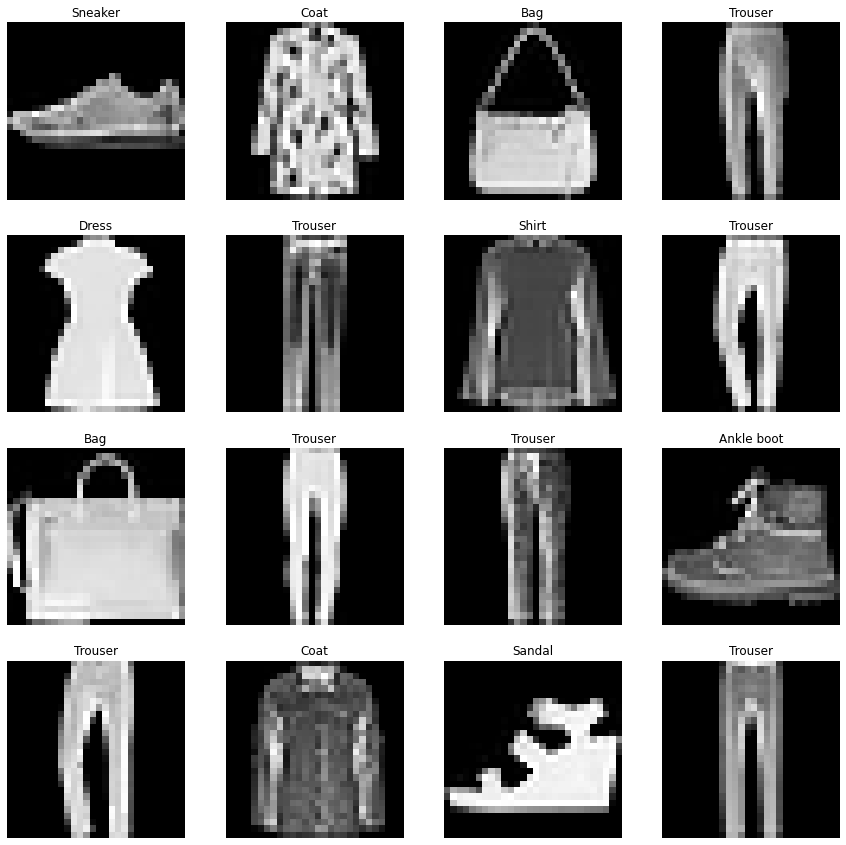

In [9]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df_train.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df_train['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [ ]:
df_train['label'].value_counts()

In [12]:
#function to get the pixel values and scale them to a range 0 to 1
def get_pixel() :
     return ['pixel' + str(i) for i in range(1, 785)]
    
df_train[get_pixel()] = df_train[get_pixel()] / 255
df_test[get_pixel()] = df_test[get_pixel()] / 255
   

# Setting the traing & test

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_train[get_pixel()],df_train.label,test_size = 0.25,random_state = 4)


## PCA :
### By using PCA, we will get a fraction from the data of each image and then we can sace memory, and even getting better accuracy

In [14]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0 ,n_components=0.85)
pca.fit(x_train)
pca_train_data = pca.transform(x_train)
pca_test_data = pca.transform(x_test)



In [15]:
print("Before PCA  = " + str(x_train.shape[1]))
print("After PCA 0.85 = " + str(pca.n_components_),"\n") 


Before PCA  = 784
After PCA 0.85 = 43 



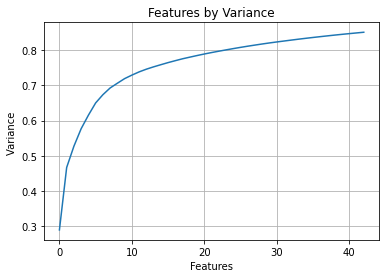

In [23]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Features')
plt.ylabel('Variance ')
plt.title('Features by Variance')
plt.grid(True)
plt.show()

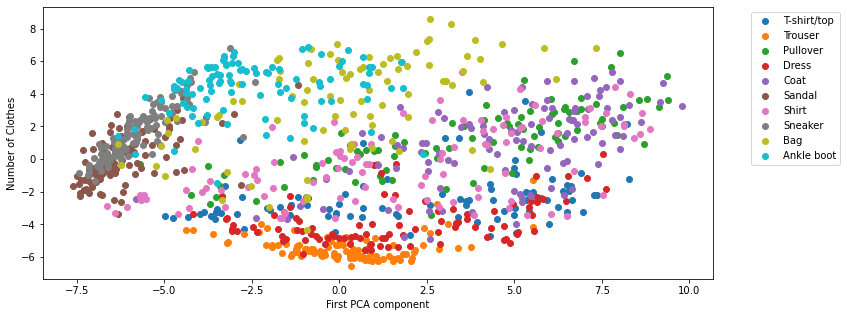

In [54]:
num = 1000
y_val = y_test.reset_index(drop=True)
sample = pca_test_data[:num, :3]
plt.figure(figsize=(12,5))
plt.subplot(111)
for lab in np.unique([a for a in clothing.keys()]):
    ix = np.where(y_val[:num] == lab)
    plt.scatter(sample[:, 0][ix], sample[:, 1][ix], label = clothing[lab])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel('First PCA component')
plt.ylabel('Number of Clothes')
plt.show()

## Modeling the data 

### KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("KNN")
print("F1 score:",knn_f1)
print("Accuracy score:",knn_accuracy)
print("Confusion matrix: \n", knn_cm)
print(metrics.classification_report(y_test, y_pred_knn))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(knn,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

KNN
F1 score: 0.8562799891500523
Accuracy score: 0.8570666666666666
Confusion matrix: 
 [[1280    1   19   31   13    0   94    0   14    0]
 [   8 1436    4   27    1    0    6    0    0    0]
 [  21    0 1201    5  138    0   95    0    1    0]
 [  81    6   19 1358   61    0   55    0    5    0]
 [   9    1  168   58 1186    0  114    0    4    0]
 [   1    0    1    0    0 1212    9  137    6   88]
 [ 284    0  225   23  103    0  906    0    8    1]
 [   0    0    0    0    0    8    1 1444    1   58]
 [   8    0   25    6   14    1   11    7 1422    1]
 [   0    0    0    0    0    1    2   55    0 1411]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1452
           1       0.99      0.97      0.98      1482
           2       0.72      0.82      0.77      1461
           3       0.90      0.86      0.88      1585
           4       0.78      0.77      0.78      1540
           5       0.99      0.83      0.91      1454
  

In [26]:
print("KNN after PCA")
knn.fit(pca_train_data,y_train)
y_pred_knn = knn.predict(pca_test_data)
print(classification_report(y_test, y_pred_knn))

KNN after PCA
              precision    recall  f1-score   support

           0       0.77      0.87      0.81      1452
           1       0.99      0.97      0.98      1482
           2       0.73      0.79      0.76      1461
           3       0.89      0.86      0.88      1585
           4       0.76      0.78      0.77      1540
           5       0.97      0.90      0.93      1454
           6       0.71      0.58      0.64      1550
           7       0.90      0.93      0.91      1512
           8       0.96      0.96      0.96      1495
           9       0.92      0.94      0.93      1469

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dt_f1 = metrics.f1_score(y_test, y_pred, average= "weighted")
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
dt_cm = metrics.confusion_matrix(y_test, y_pred)
print("Decision Tree")
print("F1 score: ",dt_f1)
print("Accuracy score: ",dt_accuracy)
print("Confusion matrix: \n", dt_cm)
print(metrics.classification_report(y_test, y_pred))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(dt,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Decision Tree------------------
F1 score:  0.7912303002367613
Accuracy score:  0.7913333333333333
Confusion matrix: 
 [[1100    9   27   64   12    3  218    0   12    7]
 [   8 1415    6   32    4    0   11    0    4    2]
 [  30    6  986   15  227    1  183    0   13    0]
 [  97   46   29 1220  103    4   76    0    9    1]
 [  11   14  223   78 1035    1  160    0   17    1]
 [   2    5    1    2    1 1307    4   73   19   40]
 [ 263   11  199   51  179    1  812    1   31    2]
 [   1    0    0    0    0   88    0 1327    5   91]
 [  15    3   16   15   14   20   34    6 1359   13]
 [   1    2    1    1    2   50    2   99    2 1309]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1452
           1       0.94      0.95      0.95      1482
           2       0.66      0.67      0.67      1461
           3       0.83      0.77      0.80      1585
           4       0.66      0.67      0.66      1540
      

In [28]:
print("Decision Tree after PCA","\n")
dt.fit(pca_train_data,y_train)
y_pred = dt.predict(pca_test_data)
dt_pca_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy score: ",dt_pca_accuracy)
print(classification_report(y_test, y_pred))

Decision Tree after PCA 

Accuracy score:  0.7702666666666667
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1452
           1       0.94      0.93      0.93      1482
           2       0.64      0.65      0.64      1461
           3       0.81      0.78      0.79      1585
           4       0.65      0.67      0.66      1540
           5       0.85      0.85      0.85      1454
           6       0.51      0.50      0.51      1550
           7       0.83      0.84      0.84      1512
           8       0.89      0.89      0.89      1495
           9       0.88      0.88      0.88      1469

    accuracy                           0.77     15000
   macro avg       0.77      0.77      0.77     15000
weighted avg       0.77      0.77      0.77     15000



# Native Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb =GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict (x_test)
gnb_f1 = metrics.f1_score(y_test,y_pred,average ="weighted")
gnb_accuracy = metrics.accuracy_score(y_test, y_pred)
gnb_cm = metrics.confusion_matrix(y_test,y_pred)
print ("Native Bayes","\n")
print ("F1 Score:",(gnb_f1))
print ("Accuracy Score:",(gnb_accuracy))
print(metrics.classification_report(y_test, y_pred))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(gnb,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)


Native Bayes 

F1 Score: 0.5711395295627526
Accuracy Score: 0.6006666666666667
              precision    recall  f1-score   support

           0       0.81      0.62      0.70      1452
           1       0.69      0.94      0.80      1482
           2       0.53      0.38      0.44      1461
           3       0.49      0.67      0.57      1585
           4       0.39      0.73      0.51      1540
           5       0.87      0.28      0.43      1454
           6       0.43      0.04      0.07      1550
           7       0.51      0.98      0.67      1512
           8       0.85      0.71      0.77      1495
           9       0.94      0.65      0.77      1469

    accuracy                           0.60     15000
   macro avg       0.65      0.60      0.57     15000
weighted avg       0.65      0.60      0.57     15000

Cross Validation Scores: [0.54066667 0.521      0.54       0.55166667 0.53866667]


In [30]:
print ("Native Bayes after PCA","\n")
gnb.fit(pca_train_data,y_train)
y_pred_nb = gnb.predict(pca_test_data)
gnb_pca_accuracy = metrics.accuracy_score(y_test, y_pred_nb)
print("Accuracy score: ",gnb_pca_accuracy)
print(classification_report(y_test, y_pred_nb))

Native Bayes after PCA 

Accuracy score:  0.7758
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1452
           1       0.99      0.90      0.94      1482
           2       0.67      0.65      0.66      1461
           3       0.78      0.81      0.79      1585
           4       0.71      0.69      0.70      1540
           5       0.84      0.80      0.82      1454
           6       0.52      0.49      0.50      1550
           7       0.81      0.87      0.84      1512
           8       0.82      0.88      0.85      1495
           9       0.90      0.91      0.90      1469

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.77     15000



# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression (C = 0.1, solver = 'sag')
lr.fit (x_train,y_train)
lr_pred = lr.predict(x_test)
lr_f1 = metrics.f1_score(y_test,lr_pred,average ="weighted")
lr_accuracy = metrics.accuracy_score(y_test, lr_pred)
lr_cm = metrics.confusion_matrix(y_test,lr_pred)

print ("Logistic Regression","\n")
print ("F1 Score:",(lr_f1))
print ("Accuracy Score:",(lr_accuracy))
print(metrics.classification_report(y_test, lr_pred))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(lr,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)

Logistic Regression 

F1 Score: 0.8520684461151737
Accuracy Score: 0.8531333333333333
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1452
           1       0.98      0.96      0.97      1482
           2       0.75      0.76      0.75      1461
           3       0.87      0.87      0.87      1585
           4       0.75      0.79      0.77      1540
           5       0.94      0.93      0.93      1454
           6       0.67      0.58      0.62      1550
           7       0.91      0.93      0.92      1512
           8       0.94      0.94      0.94      1495
           9       0.94      0.94      0.94      1469

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000

Cross Validation Scores: [0.851      0.84333333 0.845      0.84966667 0.84033333]


In [32]:
print ("Logistic Regression after PCA","\n")
lr.fit(pca_train_data,y_train)
y_pred_lr = lr.predict(pca_test_data)
lr_pca_accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy score:",lr_pca_accuracy)
print(classification_report(y_test, y_pred_lr))

Logistic Regression after PCA 

Accuracy score: 0.8338
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1452
           1       0.97      0.96      0.96      1482
           2       0.72      0.71      0.72      1461
           3       0.84      0.84      0.84      1585
           4       0.71      0.76      0.74      1540
           5       0.92      0.92      0.92      1454
           6       0.62      0.53      0.57      1550
           7       0.90      0.91      0.91      1512
           8       0.93      0.94      0.93      1495
           9       0.93      0.94      0.93      1469

    accuracy                           0.83     15000
   macro avg       0.83      0.84      0.83     15000
weighted avg       0.83      0.83      0.83     15000



# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_f1 = metrics.f1_score(y_test, y_pred_rf, average= "weighted")
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print("Random Forest","\n")
print("F1 score: ",rf_f1)
print("Accuracy score: ",rf_accuracy)
print("Confusion matrix: \n", rf_cm)
print(metrics.classification_report(y_test, y_pred_rf))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(rf,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)


Random Forest 

F1 score:  0.8765372562416797
Accuracy score:  0.8783333333333333
Confusion matrix: 
 [[1277    0   18   44   11    0   85    0   17    0]
 [   4 1433    2   33    4    0    5    0    1    0]
 [   9    0 1204    6  171    0   60    0   11    0]
 [  31    5   17 1423   56    0   47    0    6    0]
 [   4    3  125   58 1276    1   66    0    7    0]
 [   0    0    0    1    0 1393    0   39    7   14]
 [ 253    1  190   31  153    1  902    0   19    0]
 [   0    0    0    0    0   31    0 1418    2   61]
 [   2    0    9    2    5    5   16    1 1454    1]
 [   0    0    0    0    0   17    1   55    1 1395]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1452
           1       0.99      0.97      0.98      1482
           2       0.77      0.82      0.80      1461
           3       0.89      0.90      0.89      1585
           4       0.76      0.83      0.79      1540
           5       0.96      0.96      0.9

In [34]:
print ("Random Forest after PCA","\n")

rf.fit(pca_train_data,y_train)
y_pred_pca = rf.predict(pca_test_data)
pca_f1 = metrics.f1_score(y_test, y_pred_pca, average= "weighted")
pca_accuracy = metrics.accuracy_score(y_test, y_pred_pca)
pca_cm = metrics.confusion_matrix(y_test, y_pred_pca)
print("F1 Score :",pca_f1)
print ("Accuracy Score:", pca_accuracy)
print ("Confusion matrix: \n",pca_cm)
print(metrics.classification_report(y_test, y_pred_pca))



Random Forest after PCA 

F1 Score : 0.8593999425781612
Accuracy Score: 0.861
Confusion matrix: 
 [[1252    3   20   49    9    1   91    0   27    0]
 [   7 1422    2   41    2    0    7    0    1    0]
 [  11    0 1187    5  167    1   76    0   14    0]
 [  55   10   14 1390   47    0   58    0   11    0]
 [   5    0  140   62 1235    2   85    0   11    0]
 [   0    0    1    0    0 1340    0   74    7   32]
 [ 258    1  187   34  143    4  902    0   21    0]
 [   0    0    0    0    0   64    0 1371    3   74]
 [   3    0   15    7    4   16   14    4 1429    3]
 [   0    0    0    0    0   26    0   55    1 1387]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1452
           1       0.99      0.96      0.97      1482
           2       0.76      0.81      0.78      1461
           3       0.88      0.88      0.88      1585
           4       0.77      0.80      0.78      1540
           5       0.92      0.92      0.92   

## Comparing the models to see who is the most efficient

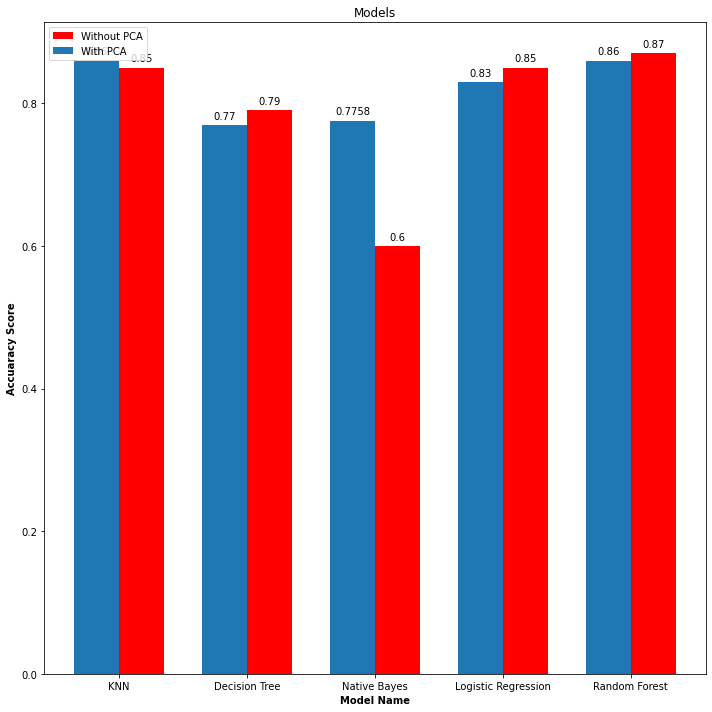

In [35]:
models = ['KNN','Decision Tree','Native Bayes', 'Logistic Regression','Random Forest']
reg_scores = [0.85,0.79,0.60,0.85,0.87]
pca_scores = [0.86,0.77,0.7758,0.83,0.86]

label = np.arange(len(models))
fig , ax =plt.subplots(figsize=(10,10))
r1=ax.bar(label + 0.35/2, reg_scores, 0.35,color ='r')
r2=ax.bar(label - 0.35/2, pca_scores, 0.35)
ax.set_title("Models")
plt.legend(['Without PCA', 'With PCA'], loc='best')
ax.set_xlabel('Model Name', fontweight="bold")
ax.set_ylabel('Accuaracy Score', fontweight="bold")
ax.set_xticks(label)
ax.set_xticklabels(models)




def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(r1)
autolabel(r2)
plt.tight_layout()
plt.show()
